# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1085ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1085_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

0        1        2
0  8.375  63.9367  0.00323
1  8.205  62.5062  0.00316
2  8.029  60.9542  0.00308
3  7.789  59.4098  0.00301
4  7.619  57.7692  0.00292

## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [8.375, 8.205, 8.029, 7.789, 7.619, 7.393, 7.224, 7.054, 6.828, 6.645, 6.454, 6.263, 6.094, 5.896, 5.713, 5.543, 5.381, 5.211, 5.014, 4.844, 4.696, 4.519, 4.364, 4.166, 4.032, 3.841, 3.686, 3.531, 3.291, 2.994, 2.952, 2.938, 2.952, 2.923, 2.923, 2.938, 2.923, 2.909, 2.881, 2.895, 2.888, 2.881, 2.853, 2.867, 2.839, 2.839, 2.81, 2.683, 0.099, 0.12, 0.113, 0.106, 0.127, 0.099, 0.12, 0.12, 0.113, 0.127, -2.676, -2.662, -2.676, -2.705, -2.705, -2.705, -2.712, -2.726, -2.74, -2.902, -3.248, -3.397, -3.608, -3.764, -3.933, -4.131, -4.286, -4.484, -4.653, -4.809, -4.985, -5.162, -5.345, -5.557, -5.755, -5.939, -6.115, -6.327, -6.532, -6.715, -6.934, -7.146, -7.358, -7.57, -7.767, -7.993, -7.796, -7.414, -7.118, -6.744, -6.44, -6.073, -5.783, -5.487, -5.183, -4.865, -4.59, -4.3, -4.004, -3.735, -3.467, -3.107, -2.803, -2.782, -2.761, -2.761, -2.747, -2.726, -2.712, -2.705, -2.683, -2.69, -2.662, 0.049, 0.042, 0.057, 0.057, 0.057, 0.049, 2.825, 2.846, 2.867, 2.853, 2.881, 2.881, 2.938, 3.48

In [5]:
def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence


lower_limit = find_last_occurrence(0.049, V)
upper_limit = V.index(5.67)

print(lower_limit)
print(upper_limit)

126
142


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.049 2.825 2.846 2.867 2.853 2.881 2.881 2.938 3.488 3.728 3.997 4.286
 4.533 4.816 5.091 5.353]
I =  [ 9.2523 11.0301 13.1796 15.0399 17.0762 18.7939 21.1208 22.8658 25.0665
 27.3074 29.4078 31.4141 33.7164 35.8243 38.1601 40.5845]


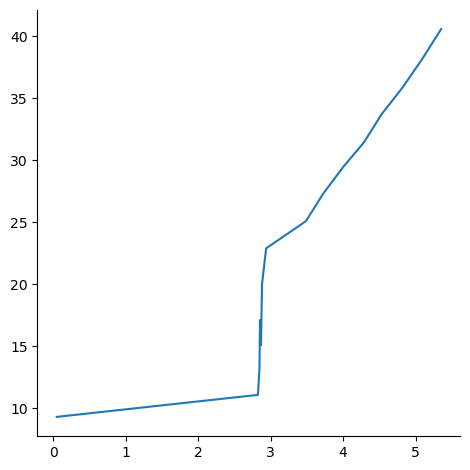

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

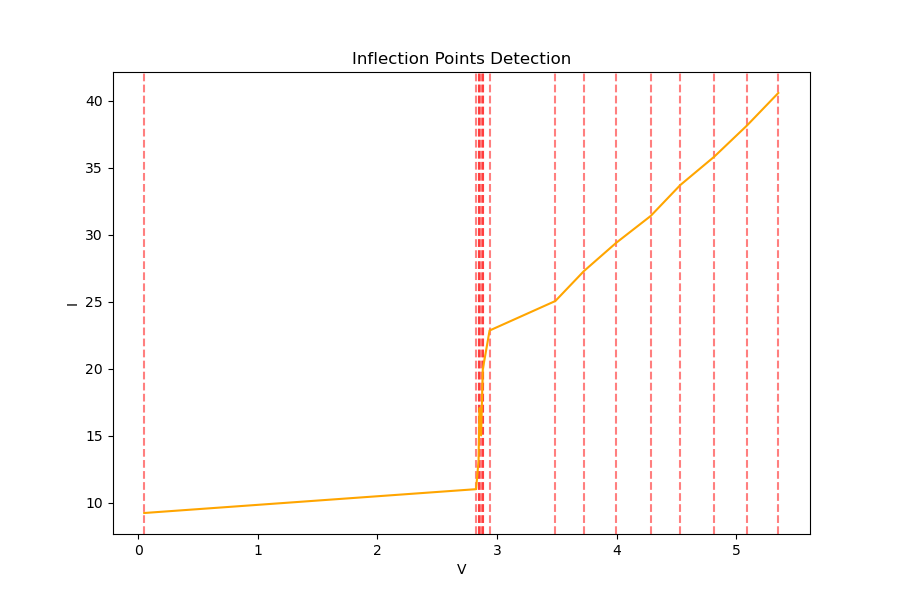

In [8]:
#Uncomment the line below to make the graph interactive
%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

In [9]:
#Preview the inflection points array
inflection_points = []

### Clear the graph above to focus on Ic and Vc

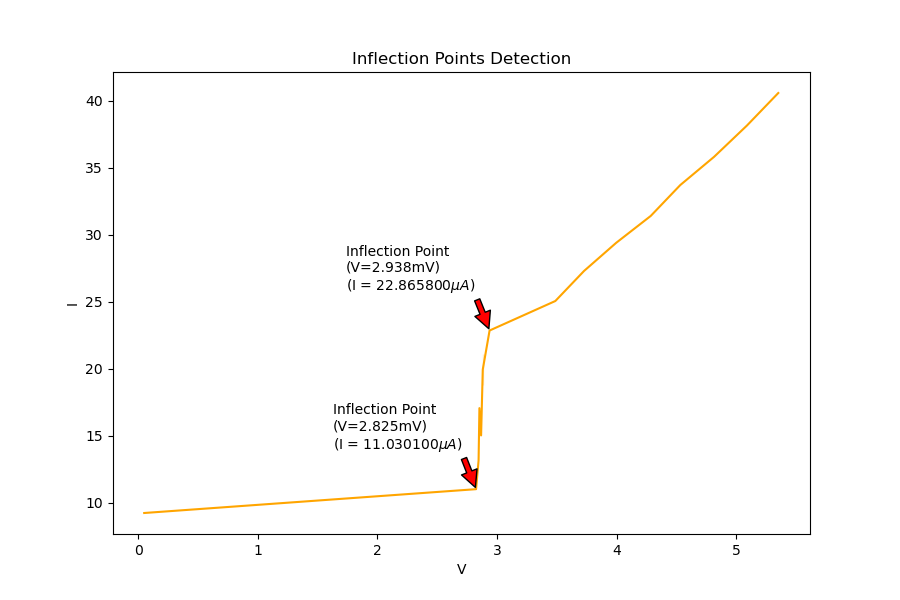

In [10]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 7]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [11]:
#Preview the main dataset
print(list(df[0]))

[8.375, 8.205, 8.029, 7.789, 7.619, 7.393, 7.224, 7.054, 6.828, 6.645, 6.454, 6.263, 6.094, 5.896, 5.713, 5.543, 5.381, 5.211, 5.014, 4.844, 4.696, 4.519, 4.364, 4.166, 4.032, 3.841, 3.686, 3.531, 3.291, 2.994, 2.952, 2.938, 2.952, 2.923, 2.923, 2.938, 2.923, 2.909, 2.881, 2.895, 2.888, 2.881, 2.853, 2.867, 2.839, 2.839, 2.81, 2.683, 0.099, 0.12, 0.113, 0.106, 0.127, 0.099, 0.12, 0.12, 0.113, 0.127, -2.676, -2.662, -2.676, -2.705, -2.705, -2.705, -2.712, -2.726, -2.74, -2.902, -3.248, -3.397, -3.608, -3.764, -3.933, -4.131, -4.286, -4.484, -4.653, -4.809, -4.985, -5.162, -5.345, -5.557, -5.755, -5.939, -6.115, -6.327, -6.532, -6.715, -6.934, -7.146, -7.358, -7.57, -7.767, -7.993, -7.796, -7.414, -7.118, -6.744, -6.44, -6.073, -5.783, -5.487, -5.183, -4.865, -4.59, -4.3, -4.004, -3.735, -3.467, -3.107, -2.803, -2.782, -2.761, -2.761, -2.747, -2.726, -2.712, -2.705, -2.683, -2.69, -2.662, 0.049, 0.042, 0.057, 0.057, 0.057, 0.049, 2.825, 2.846, 2.867, 2.853, 2.881, 2.881, 2.938, 3.488, 3.

In [12]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function that returns the index of the last occurrence of an item in a list
def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

low_limit = find_last_occurrence(2.938, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0][len(df[0]) - 1])

print(low_limit) 
print(up_limit)

133
150


In [13]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.938 3.488 3.728 3.997 4.286 4.533 4.816 5.091 5.353 5.67  5.917 6.256
 6.532 6.857 7.111 7.485 7.746]
[22.8658 25.0665 27.3074 29.4078 31.4141 33.7164 35.8243 38.1601 40.5845
 42.9176 45.1728 47.4854 49.6663 52.2551 54.6346 57.1948 59.8934]


## Define the model and fit the data

In [14]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.0195))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 2
    chi-square         = 15.0131092
    reduced chi-square = 1.00087395
    Akaike info crit   = 1.88707720
    Bayesian info crit = 3.55350389
    R-squared          = 1.00000000
[[Variables]]
    slope:      7798.89854 +/- 129.132650 (1.66%) (init = 7932.435)
    intercept: -1370696.18 +/- 617360.623 (45.04%) (init = -2038962)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9612


## Plot the model

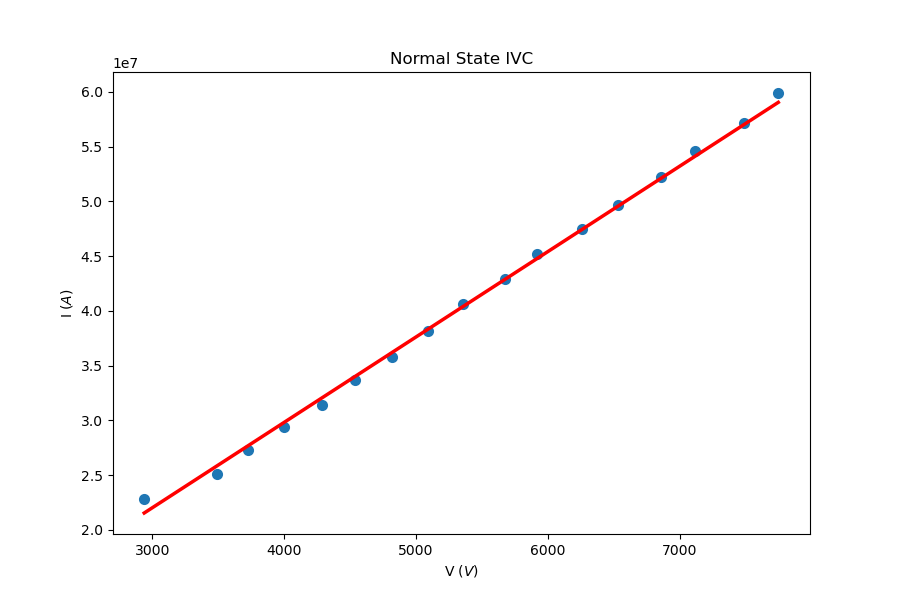

In [15]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [16]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7798.898536146778, 'intercept': -1370696.178116956}

In [17]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000128 Ohm


In [18]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.87923069 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.87923069 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.6946164875681205e-22 J
Gap Energy = 5.389232975136241e-22 J
Gap Voltage = 3.363645596764599 mV
Josephson Current = 19.861901900588613 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.14439081849101e-22 J
Gap Energy =  4.28878163698202e-22 J
Gap Voltage = 2.67680791223444 mV
Josephson Current = 15.090771949840262 uA
________________________________
________________________________
________________________________


In [19]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[7], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 22.8658, 'Ic_weak': 19.8619, 'Ic_strong': 15.0908, 'V_gap': 2.825, 'Vg_weak': 3.3636, 'Vg_strong': 2.6768, 'Temp': 4.8792}


## Export the results to a csv file

In [20]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>